**Transfer learning for Image Classification**



In this notebook I've used transfer learning and took pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves a lot of time and computational budget for new classification problem at hand.

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub
from tensorflow import keras
from tensorflow.keras import layers, models 

**Load flowers dataset**

In [2]:
url= 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir= tf.keras.utils.get_file('flower_photos', origin=url, cache_dir='.', untar= True)

In [3]:
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/8908097235_c3e746d36e_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2351637471_5dd34fd3ac_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/738207467_fc59cfcd9b_z.jpg'),
 PosixPath('datasets/flower_photos/tulips/3637371174_a8dfcc1b35.jpg'),
 PosixPath('datasets/flower_photos/tulips/14674071872_2df55466d5_m.jpg')]

In [5]:
daisy= list(data_dir.glob('daisy/*.jpg'))
daisy[:3]

[PosixPath('datasets/flower_photos/daisy/506018088_4f7a15a7c5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/15327813273_06cdf42210.jpg'),
 PosixPath('datasets/flower_photos/daisy/4333085242_bbeb3e2841_m.jpg')]

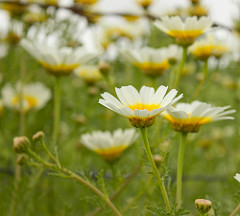

In [6]:
import PIL.Image as Image
im= Image.open(daisy[4])
im


In [7]:
np.array(im).shape

(216, 240, 3)

**Read flower images from disk into numpy array using opencv**

In [8]:
import cv2
img= cv2.imread(str(daisy[0]))
img

array([[[254, 252, 252],
        [252, 255, 246],
        [251, 252, 248],
        ...,
        [ 34,  97,  81],
        [ 36,  89,  75],
        [ 34,  70,  58]],

       [[255, 249, 244],
        [255, 255, 244],
        [255, 255, 246],
        ...,
        [ 33,  84,  70],
        [ 36,  74,  62],
        [ 33,  57,  47]],

       [[236, 225, 211],
        [254, 250, 231],
        [247, 248, 228],
        ...,
        [ 27,  59,  48],
        [ 29,  50,  41],
        [ 31,  39,  32]],

       ...,

       [[ 41,  75,  58],
        [ 37,  74,  54],
        [ 44,  84,  59],
        ...,
        [ 18,  87,  54],
        [  8,  75,  43],
        [ 13,  77,  42]],

       [[ 43,  82,  61],
        [ 37,  79,  56],
        [ 43,  88,  62],
        ...,
        [ 19,  83,  53],
        [  6,  64,  35],
        [ 18,  72,  43]],

       [[ 41,  80,  54],
        [ 41,  80,  58],
        [ 49,  90,  69],
        ...,
        [ 28,  92,  62],
        [ 13,  71,  42],
        [ 24,  75,  48]]

In [9]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [10]:
flowers_dict= {
    'roses': list(data_dir.glob('roses/*.jpg')),
    'daisy': list(data_dir.glob('daisy/*.jpg')),
    'sunflowers': list(data_dir.glob('sunflowers/*.jpg')),
    'dandelion': list(data_dir.glob('dandelion/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg'))
}

In [11]:
# For model creation.
flowers_dict_labels= {
    'roses': 0,
    'daisy': 1,
    'sunflowers': 2,
    'dandelion': 3,
    'tulips': 4
}

In [12]:
X,y= [],[]
import cv2
for flower_name, images in flowers_dict.items():
    for i in images:
        img= cv2.imread(str(i))
        resized_img= cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_dict_labels[flower_name])

**Preprocessing: scale images**

In [13]:
len(X), len(y)

(3670, 3670)

In [14]:
X_n= X[:2000]
y_n= y[:2000]

In [15]:
X_n= np.array(X_n)
X_n= X_n/255
y_n= np.array(y_n)

**Make predictions using ready made model (without any training)**

In [17]:
IMAGE_SHAPE = (224, 224)  # mobilenet_v2 is having this image size.

classifier = models.Sequential([
    tensorflow_hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


**Train test split**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size= 0.28, random_state=6)

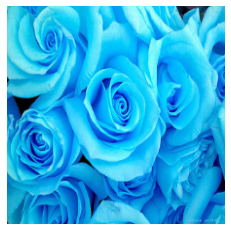

In [20]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(X[5])

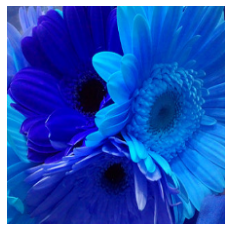

In [21]:
plt.axis('off')
plt.imshow(X[99])

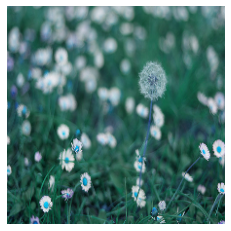

In [22]:
plt.axis('off')
plt.imshow(X[2322])

In [23]:
predicted = classifier.predict(np.array([X[5], X[99], X[2322]]))
predicted

array([[ 0.19580626, -0.7352018 ,  1.8405834 , ..., -1.5602485 ,
        -2.111681  ,  3.9330943 ],
       [ 0.26831213, -0.51317304,  2.0221    , ..., -0.7720997 ,
        -1.3932805 ,  2.8713355 ],
       [ 0.14458048, -0.01035827,  1.5273091 , ..., -0.98928297,
        -0.6766845 ,  3.4259815 ]], dtype=float32)

In [24]:
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 795])

In [25]:
url= 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
ImageNetLabels= tf.keras.utils.get_file('ImageNetLabels.txt', origin=url)

In [26]:
image_labels = []
with open(ImageNetLabels, "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [27]:
image_labels[795]

'shower curtain'

As the model performed too worst on flowers dataset. So I took pre-trained model and retrained it using flowers images.

In [28]:
model = models.Sequential([
    tensorflow_hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=(224, 224, 3), trainable=False),
    layers.Dense(5)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [29]:
model.compile(
  optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs= 10)

Epoch 1/10
45/45 [==============================] - 5s 38ms/step - loss: 2.8659 - accuracy: 0.4914
Epoch 2/10
45/45 [==============================] - 2s 38ms/step - loss: 1.1925 - accuracy: 0.7383
Epoch 3/10
45/45 [==============================] - 2s 38ms/step - loss: 1.5324 - accuracy: 0.8234
Epoch 4/10
45/45 [==============================] - 2s 38ms/step - loss: 1.1537 - accuracy: 0.8530
Epoch 5/10
45/45 [==============================] - 2s 38ms/step - loss: 1.3343 - accuracy: 0.8037
Epoch 6/10
45/45 [==============================] - 2s 38ms/step - loss: 1.3282 - accuracy: 0.7875
Epoch 7/10
45/45 [==============================] - 2s 38ms/step - loss: 1.3565 - accuracy: 0.7817
Epoch 8/10
45/45 [==============================] - 2s 38ms/step - loss: 1.3652 - accuracy: 0.7779
Epoch 9/10
45/45 [==============================] - 2s 39ms/step - loss: 1.3832 - accuracy: 0.7804
Epoch 10/10
45/45 [==============================] - 2s 38ms/step - loss: 1.3875 - accuracy: 0.7765


In [31]:
model.evaluate(X_test,y_test)

18/18 [==============================] - 1s 46ms/step - loss: 1.3944 - accuracy: 0.7768


[1.3944419622421265, 0.7767857313156128]